# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
comb_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
comb_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_count = len(comb_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = comb_df[comb_df.duplicated(subset=["Mouse ID", "Timepoint"])]
dup_mice_list = dup_mice["Mouse ID"].unique()
dup_mice_list

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse = comb_df[comb_df["Mouse ID"] == dup_mice_list[0]]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = comb_df[comb_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
cln_mice_count = len(clean_df["Mouse ID"].unique())
cln_mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_df = pd.DataFrame(clean_df["Drug Regimen"].unique(), columns=["Drug Regimen"]).sort_values(by="Drug Regimen", ascending=True)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index()
tumor_med = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index()
tumor_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index()
tumor_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index()
tumor_err = (clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std() / np.sqrt(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count())).reset_index()

# Assemble the resulting series into a single summary DataFrame.
reg_df = pd.merge(reg_df, tumor_mean, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
reg_df = pd.merge(reg_df, tumor_med, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})
reg_df = pd.merge(reg_df, tumor_var, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
reg_df = pd.merge(reg_df, tumor_std, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
reg_df = pd.merge(reg_df, tumor_err, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})

reg_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
reg_agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
reg_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

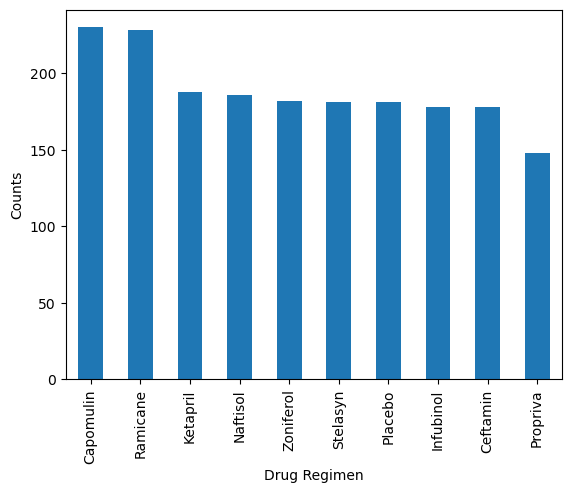

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

plt.show()


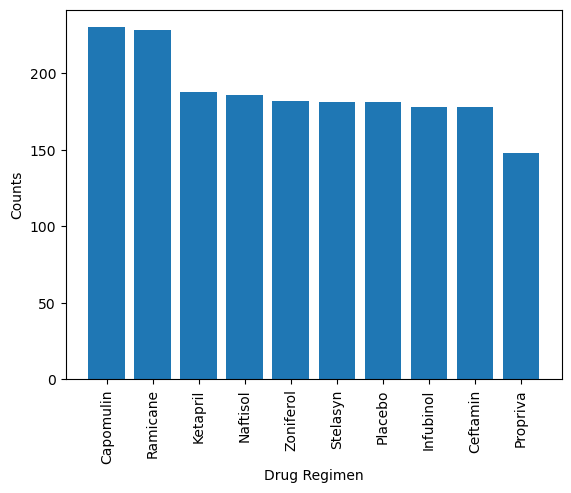

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
reg_bar = clean_df['Drug Regimen'].value_counts()

plt.bar(reg_bar.index, reg_bar.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")
plt.xticks(rotation='vertical')

plt.show()

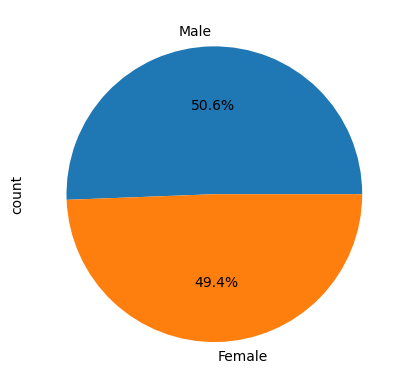

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
pd_gen_pie = comb_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Get the unique mice with their gender
labels=comb_df['Sex'].value_counts().index  #this doesn't seem to be necessary, I'm not sure what this is asking for.

# Make the pie chart
plt.show()


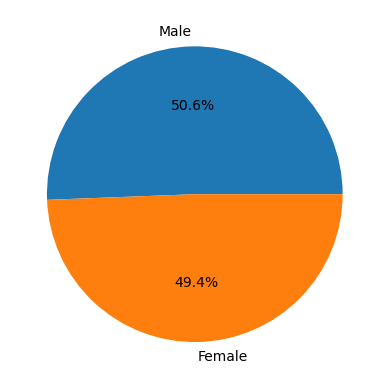

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
pl_gen_pie = comb_df['Sex'].value_counts()

# Get the unique mice with their gender
plt.pie(pl_gen_pie.values, labels = pl_gen_pie.index, autopct='%1.1f%%')

# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
    # Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_times = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge and filter a dataframe for only the final timepoints:
fin_time_df = pd.merge(clean_df, final_times, on="Mouse ID",how="left")\
     .rename(columns={"Timepoint_x":"Timepoint","Timepoint_y":"Final Timepoint"})
fin_time_df = fin_time_df[fin_time_df["Timepoint"] == fin_time_df["Final Timepoint"]]

filtered_fin_time_df = fin_time_df[["Mouse ID", "Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
fin_clean_df = pd.merge(clean_df, filtered_fin_time_df, on="Mouse ID", how="left")

# Calculate the final tumor volume of each mouse across the four treatment regimens requested above:
treatment_compare = fin_time_df[(fin_time_df["Drug Regimen"] == "Capomulin") |
                                (fin_time_df["Drug Regimen"] == "Ramicane") |
                                (fin_time_df["Drug Regimen"] == "Infubinol") | 
                                (fin_time_df["Drug Regimen"] == "Ceftamin")]

treatment_compare

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
180,u153,0,45.000000,0,Ceftamin,Female,11,25,0
192,b447,0,45.000000,0,Ceftamin,Male,2,30,0
215,x226,0,45.000000,0,Ceftamin,Male,23,28,0
220,t573,0,45.000000,0,Ceftamin,Female,15,27,0
416,c326,5,36.321346,0,Infubinol,Female,18,25,5
...,...,...,...,...,...,...,...,...,...
1866,a644,45,32.978522,1,Ramicane,Female,7,17,45
1872,i177,45,33.562402,3,Ramicane,Male,10,18,45
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = treatment_compare["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
t_vols = []

t_iqr = {}
t_outs = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for t in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    df = treatment_compare[treatment_compare["Drug Regimen"] == t]
    t_vols = df["Tumor Volume (mm3)"]

    quartiles = t_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset
    t_iqr.update({t:iqr})

    # Determine outliers using upper and lower bounds
    outs = [v for v in t_vols if v < lowerq or v > upperq]

    # Update t_outs dictionary with outliers for each treatment
    t_outs.update({t: outs})

# Print the dictionary containing outliers for each treatment
print(t_outs)

{'Ceftamin': [45.0, 45.0, 45.0, 45.0, 47.7846818, 46.78453491, 64.72983655, 68.59474498, 67.52748237, 67.74866174, 64.63494887, 68.92318457], 'Infubinol': [36.3213458, 46.25011212, 47.01036401, 45.69933088, 51.54243058, 50.00513807, 67.28962147, 67.68556862, 72.2267309, 66.19691151, 66.08306589, 67.97341878], 'Ramicane': [43.16637266, 44.18345092, 43.41938077, 31.09533505, 45.22086888, 30.27623175, 30.63869575, 30.56462509, 22.05012627, 43.0475426, 40.66771292, 29.12847181], 'Capomulin': [46.53920617, 30.48598484, 41.48300765, 31.8962384, 40.65812366, 28.43096411, 28.48403281, 23.34359787, 40.72857787, 47.68596303, 41.58152074, 31.02392294]}


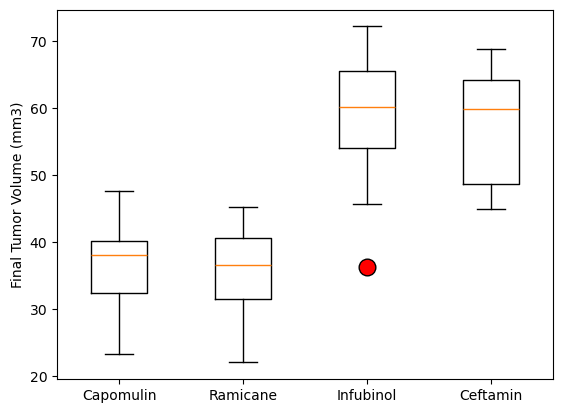

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

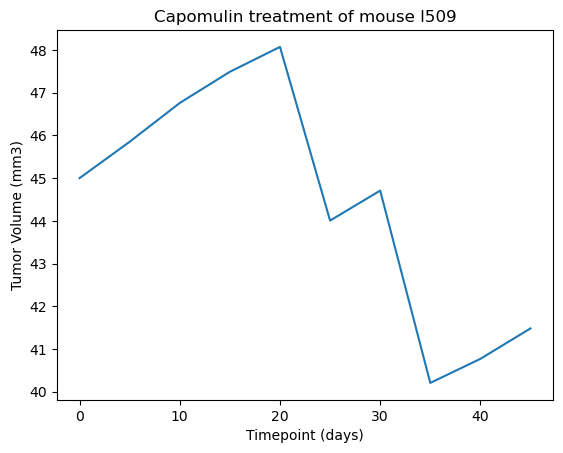

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


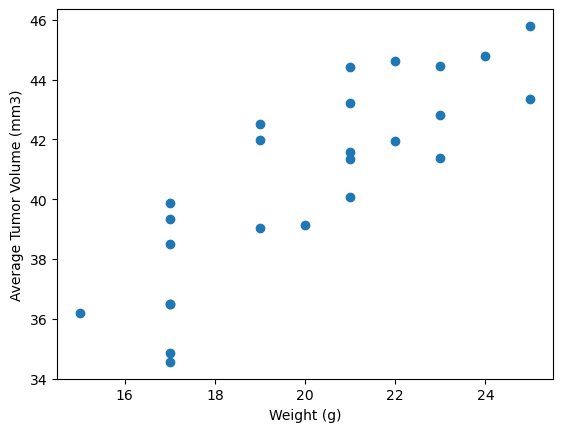

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


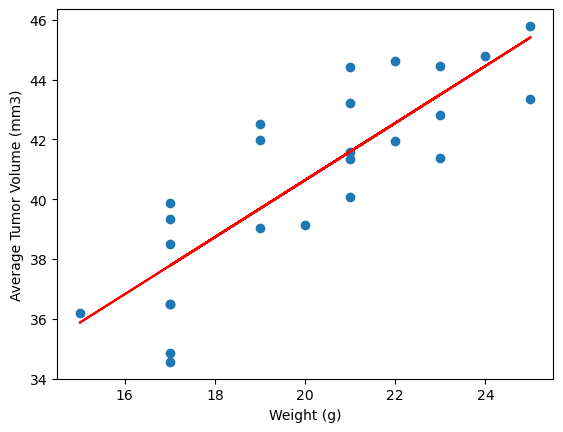

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
